# <center><b>COMPONENT 2</b></center>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("C:\\Users\\JAYA SAI SRIKAR\\OneDrive\\Desktop\\Projects\\P4\\Video_Games.csv")

# Drop any rows with missing values
df.dropna(inplace=True)

# Select features and target variable
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score']]
y = df['Global_Sales']

# Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(X, columns=['Critic_Score', 'User_Score'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_reg.predict(X_test)
score = rf_reg.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared score: {score}")
print(f"Mean Squared Error: {mse}")


R-squared score: 0.9816770678579932
Mean Squared Error: 0.043878444584582205


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv("C:\\Users\\JAYA SAI SRIKAR\\OneDrive\\Desktop\\Projects\\P4\\Video_Games.csv")

# Drop any rows with missing values
df.dropna(inplace=True)

# Select features and target variable
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'User_Score']]
y = df['Global_Sales']

# Convert categorical variables to numerical using One-Hot Encoding
X = pd.get_dummies(X, columns=['Critic_Score', 'User_Score'], drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a KMeans clustering model to get Silhouette score
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
silhouette = silhouette_score(X_train, kmeans.labels_)

# Train a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_acc = dt_model.score(X_test, y_test)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_acc = rf_model.score(X_test, y_test)

print(f"Silhouette score: {silhouette}")
print(f"Decision Tree accuracy: {dt_acc}")
print(f"Random Forest accuracy: {rf_acc}")


Silhouette score: 0.8513338725038633
Decision Tree accuracy: 0.9465581351085748
Random Forest accuracy: 0.9816770678579932


# <center>COMPONENT THREE</center>

Epoch 1/5
938/938 [==============================] - 25s 25ms/step - loss: 0.1861 - accuracy: 0.9434 - val_loss: 0.0593 - val_accuracy: 0.9814
Epoch 2/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0517 - accuracy: 0.9841 - val_loss: 0.0416 - val_accuracy: 0.9866
Epoch 3/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0343 - val_accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0308 - val_accuracy: 0.9904
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 0.0295 - accuracy: 0.9917
Test accuracy: 0.9916999936103821
1/1 [==============================] - 0s 16ms/step


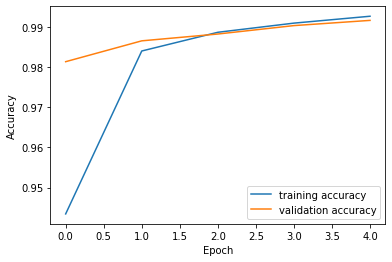

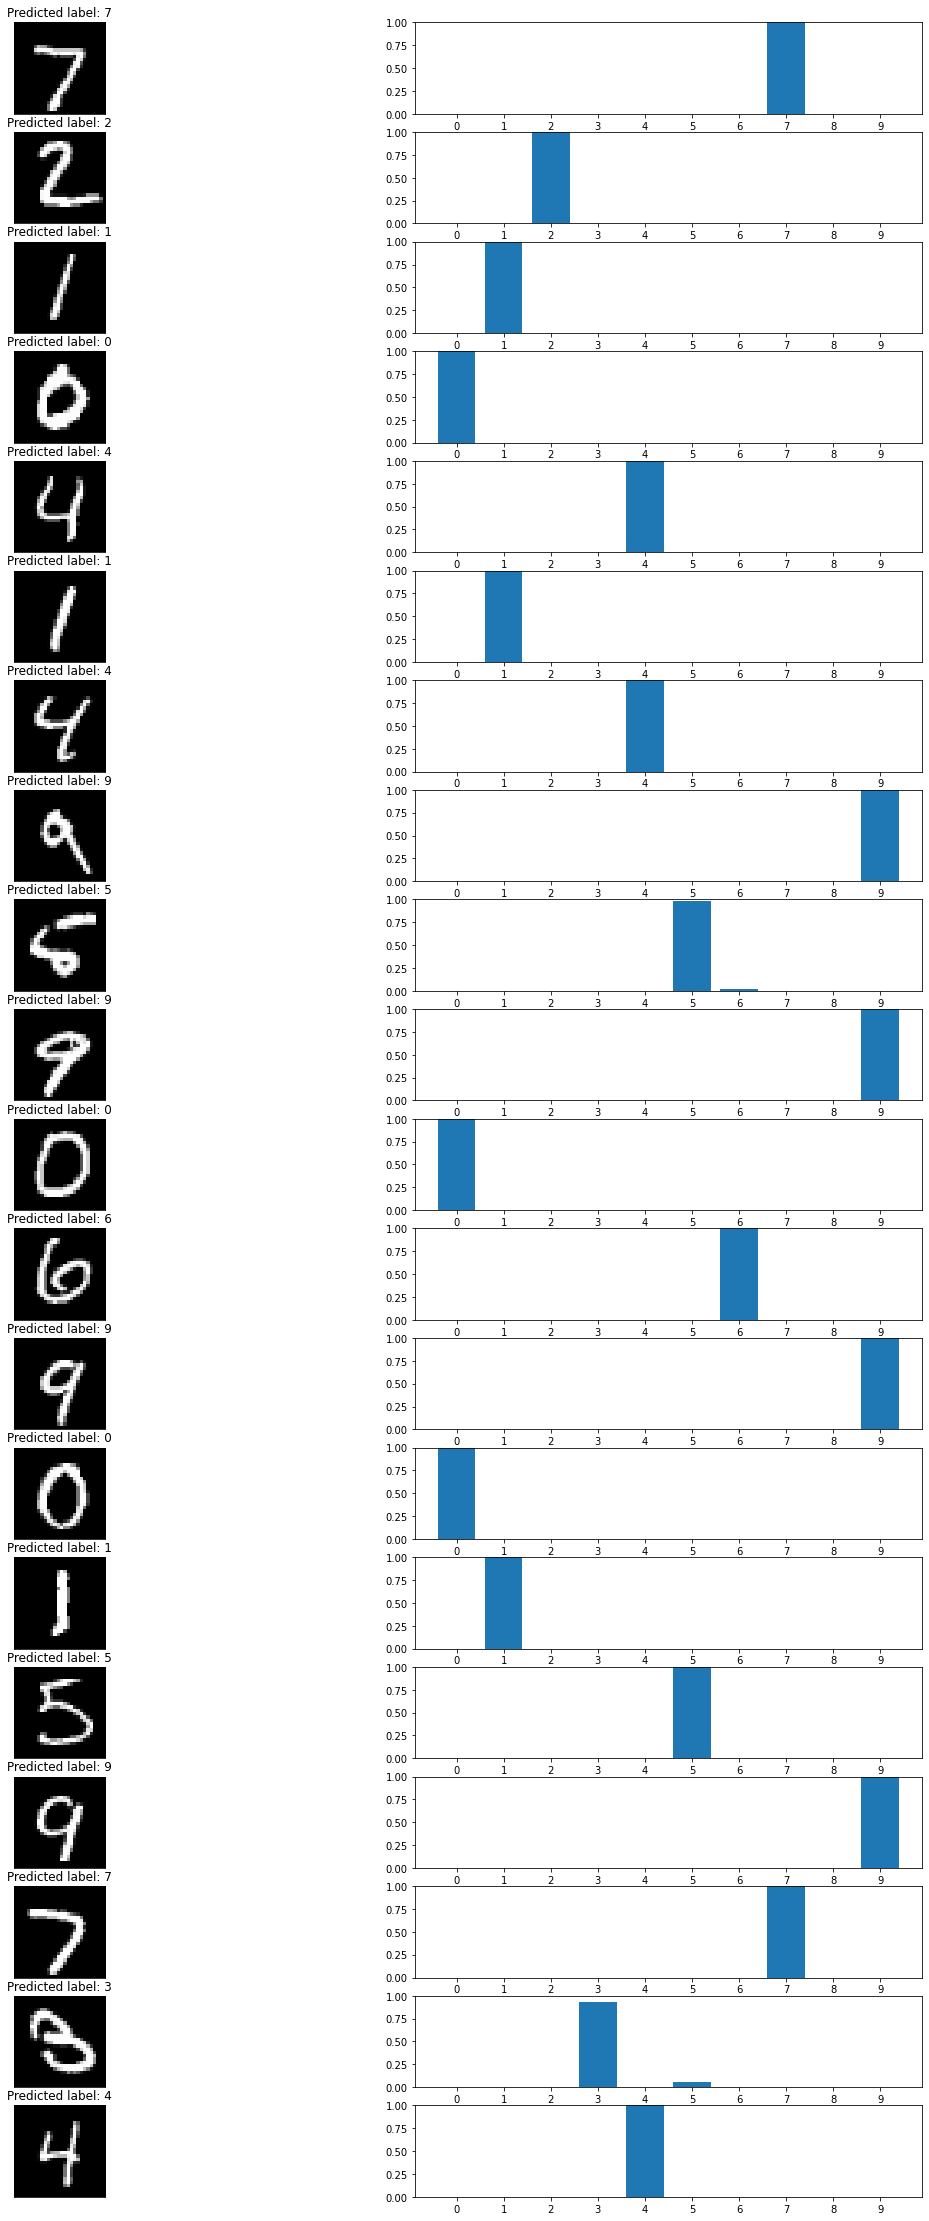

In [3]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset from a local path
(X_train, y_train), (X_test, y_test) = mnist.load_data(path="C:\\Users\\JAYA SAI SRIKAR\\OneDrive\\Desktop\\Projects\\P4\\train-images.idx3-ubyte")

# Reshape the training and test data to have a single channel
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the training data and validate with the test data
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot some example predictions
num_examples = 20
fig, axes = plt.subplots(nrows=num_examples, ncols=2, figsize=(20, 40))
for i in range(num_examples):
    # Make a prediction
    prediction = model.predict(X_test[i:i+1])[0]
    predicted_label = np.argmax(prediction)
    # Plot the image and the predicted label
    axes[i, 0].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].set_title(f'Predicted label: {predicted_label}')
    # Plot the predicted probabilities for each class
    axes[i, 1].bar(x=range(10), height=prediction)
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_ylim([0, 1])
plt.show()
